***BASE BALL CASE STUDY***




***Importing Necessary Libraries***

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

***Importing Data set***

In [3]:
df = pd.read_csv("Downloads/baseball.csv")

In [5]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


***Performing Exploratory Data Analysis***

In [7]:
#checking dimension of data set
df.shape

(30, 17)

our data is having 30 rows and 17 columns

In [14]:
#checking names of columns
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

***according to the given dataset****
Input features:
    R  :Runs
    AB :At Bats
    H  :Hits
    2B :Doubles
    3B :Triples
    HR :Homeruns
    BB :Walks
    SO :Strikeouts
    SB :Stolen Bases
    RA :Run Allowed
    ER :Earned Runs
    ERA:Earned Run Average (ERA)
    CG :Complete games ( referred online)
    SHO:Shutouts
    SV :Saves
    E  :Errors
 Output features:
    W  :Number of predicted wins (W)

In [9]:
#checking the detail info about data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Our dtypes are accurate to proceed with further analysis, conversion of dtypes is not needed.

In [10]:
#Checking and counting no of null values present in data set
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

There are no null values in the dataset

<Axes: >

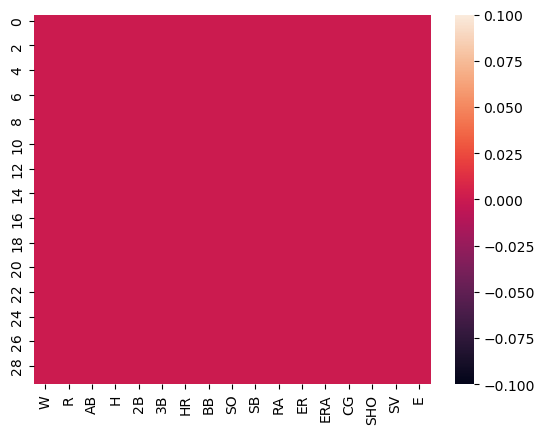

In [11]:
#verifying the null values using heat map
sns.heatmap(df.isnull())

***Statistical summary of dataset***

In [13]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


observations:

Our data is positively skewd as we can observe mean is greater than 2nd quantile.

There can be seen some outliers are present in some columns.

we will do graphical analysis to investigate further.
 

***DATA VISUALIZATION***

***univariate analysis***

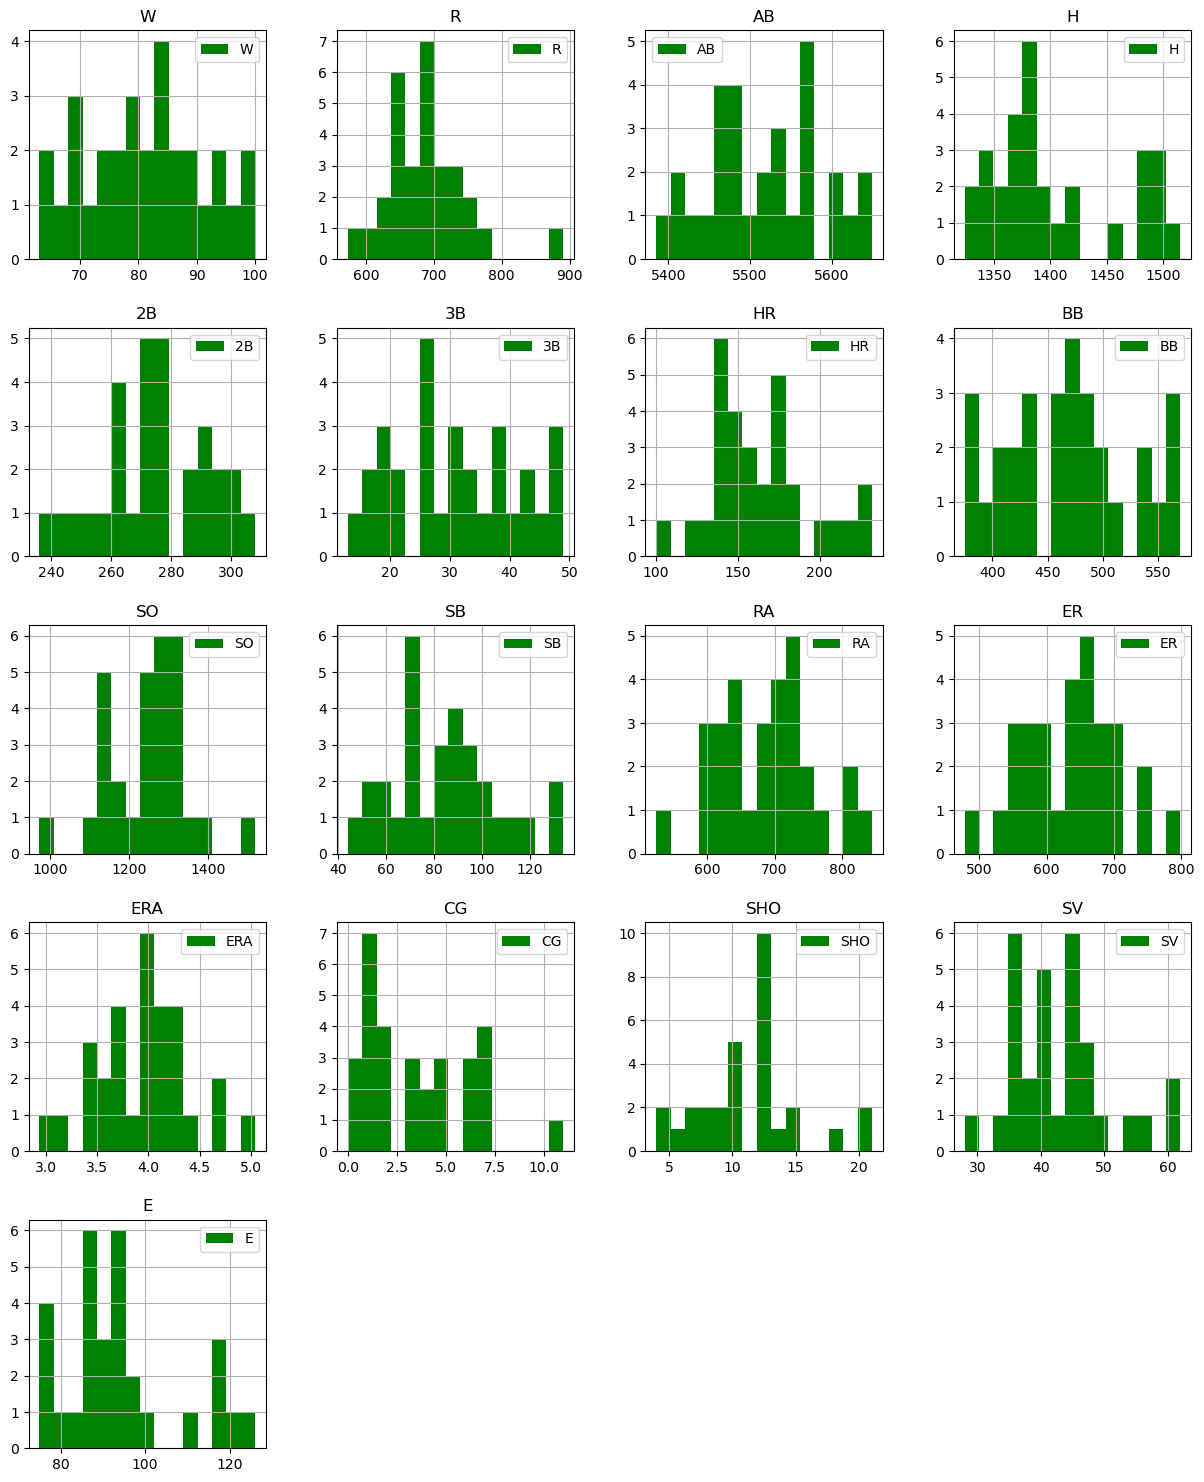

In [27]:
df.hist(figsize=(15,30),layout=(8,4),bins=15,legend=True, color='g')
plt.show()

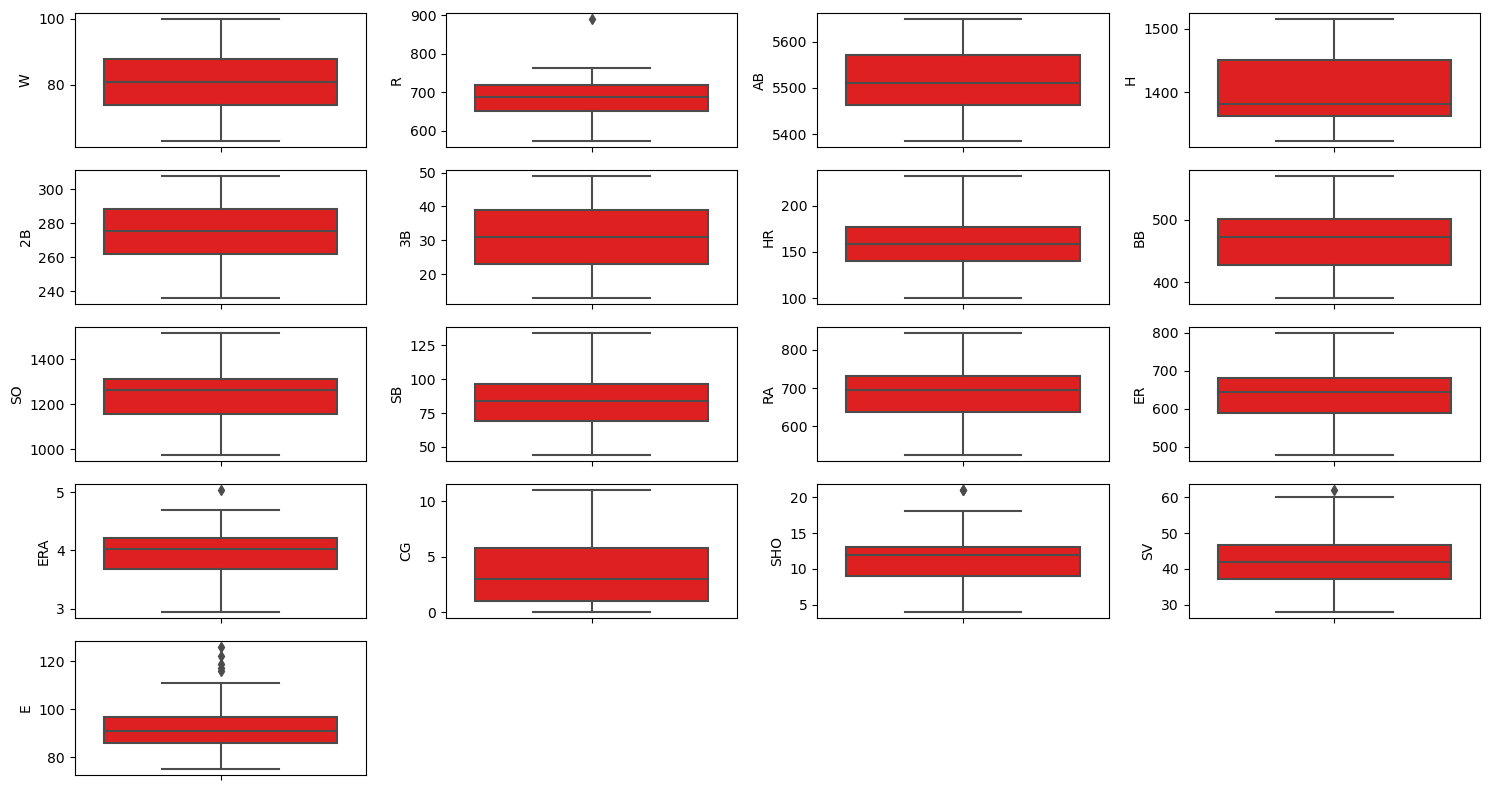

In [28]:
col= df.columns
plt.figure(figsize=(15,8))
for i in range(17):
    plt.subplot(5,4,i+1) 
    sns.boxplot(y=df[col[i]],color='r')
    plt.tight_layout()

as we can observe from both graphs
there are some outliers present in single columns ie R,ERA,SHO,SV,E

***Bivariate analysis***

comparing our output feature 'w' with other features

In [73]:
def F(df,i): # we are creating function for variables
    sns.regplot(x=i, y='W', data=df, color='y')
    plt.show

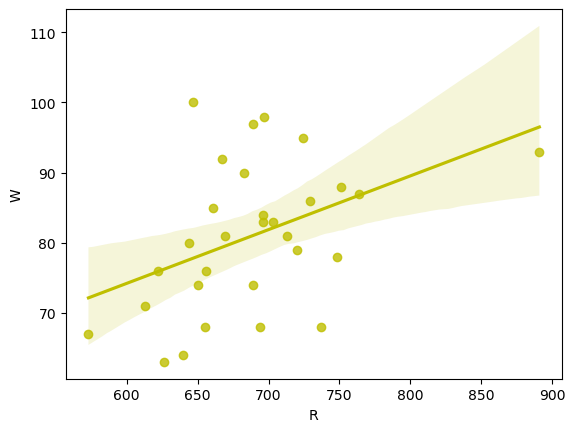

In [74]:
F(df, 'R')

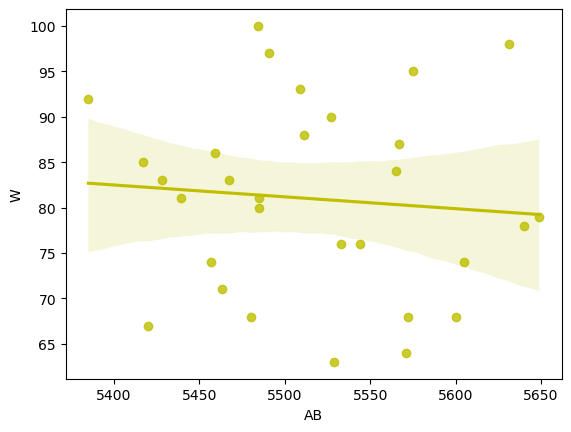

In [75]:
F(df, 'AB')

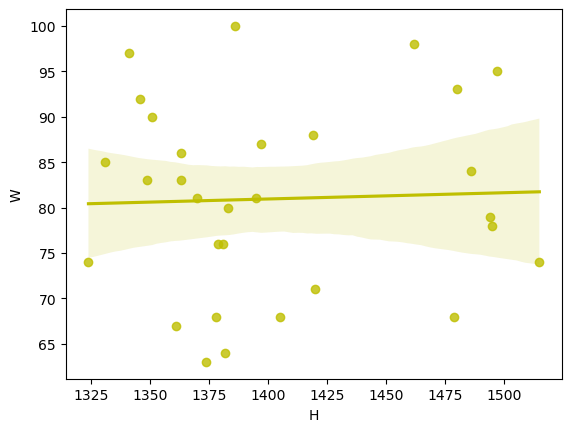

In [76]:
F(df, 'H')

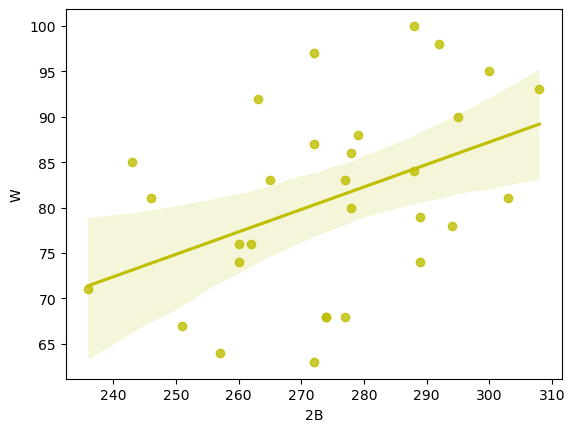

In [77]:
F(df, '2B')

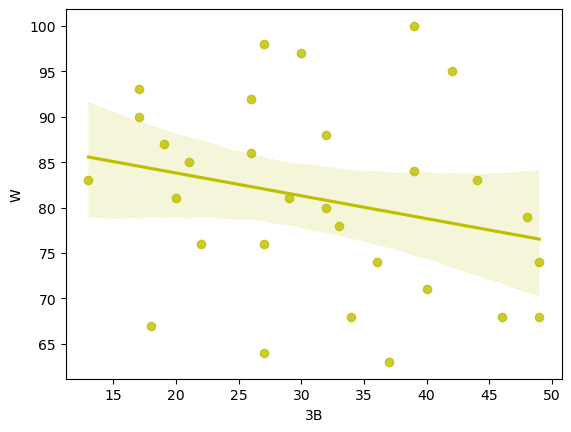

In [78]:
F(df, '3B')

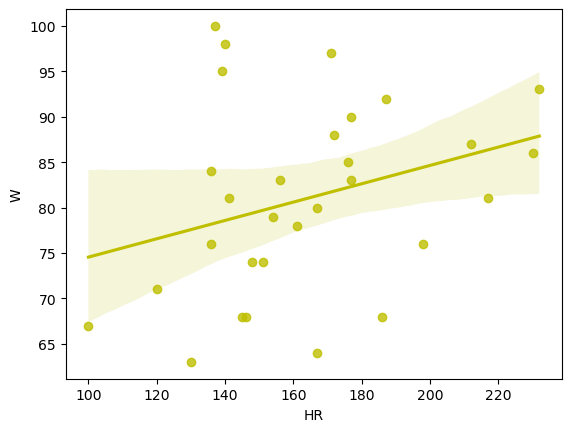

In [79]:
F(df, 'HR')

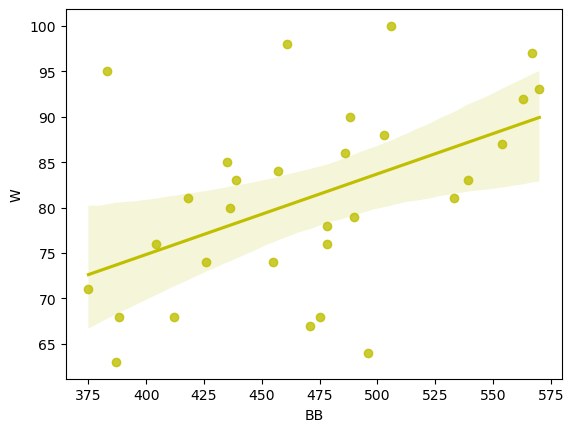

In [80]:
F(df, 'BB')

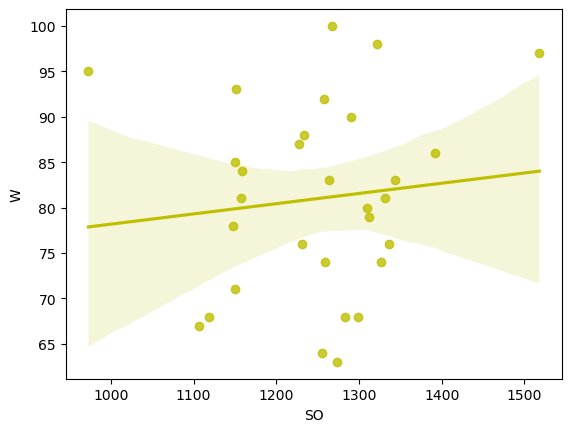

In [81]:
F(df, 'SO')

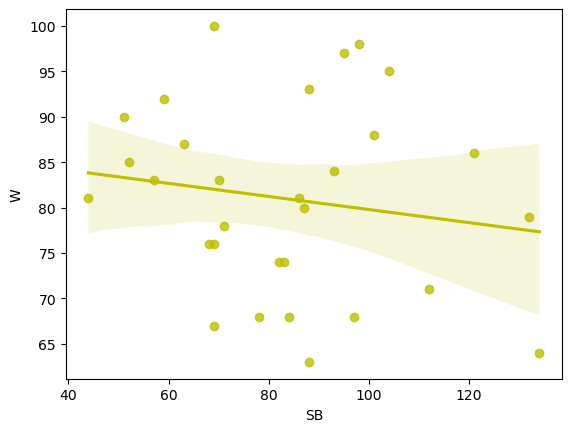

In [82]:
F(df, 'SB')

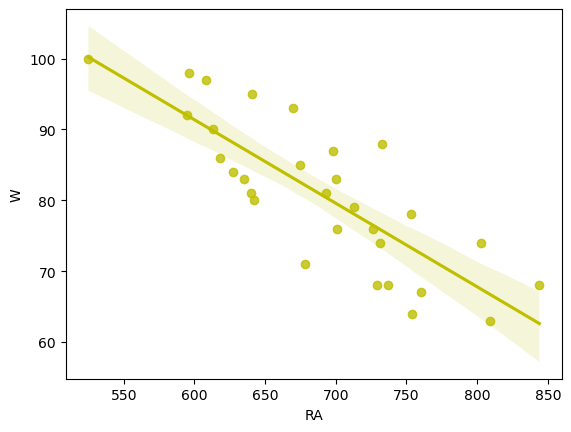

In [83]:
F(df, 'RA')

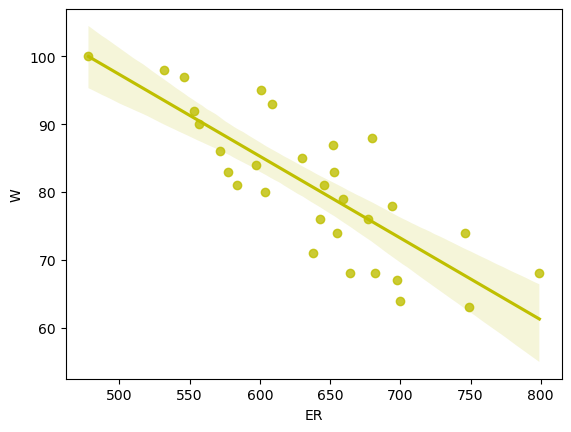

In [84]:
F(df, 'ER')

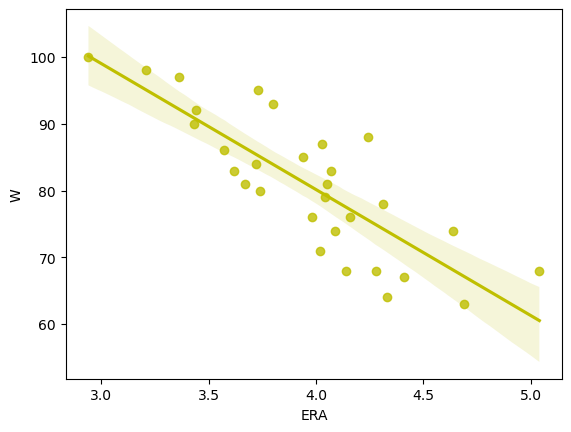

In [85]:
F(df, 'ERA')

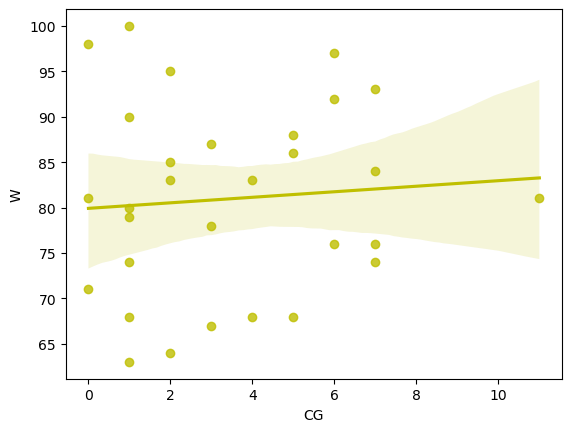

In [86]:
F(df, 'CG')

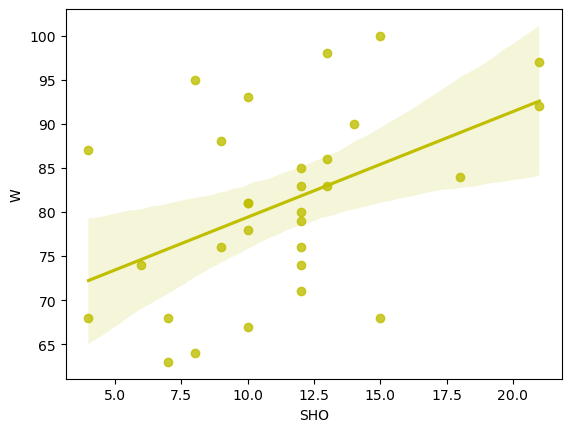

In [87]:
F(df, 'SHO')

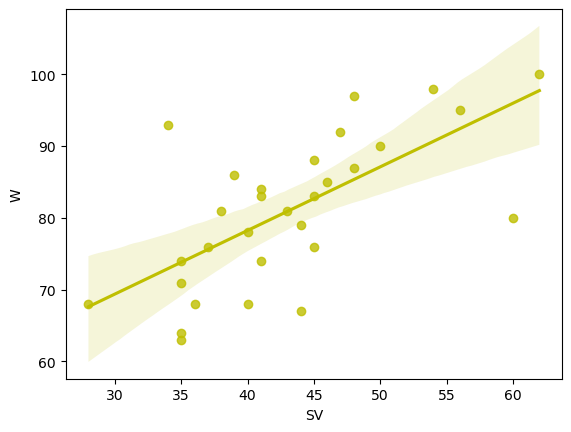

In [88]:
F(df, 'SV')

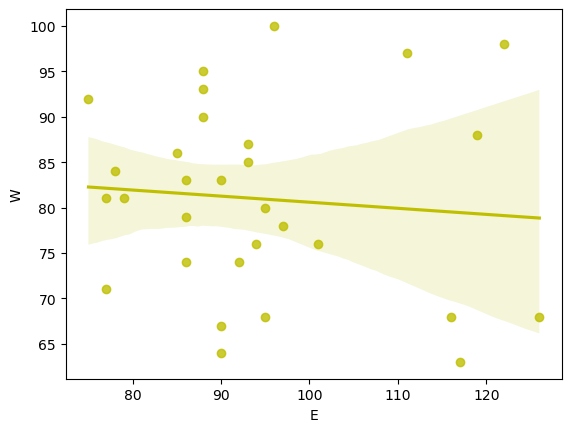

In [89]:
F(df, 'E')

observations :
HR,R,SHO,2B,SV,BB are strongly positively correlated. SB,RA and ER are negative linearly correlated
other features have less correlation with no of wins

***removing outliers by zscore method***

In [91]:
from scipy.stats import zscore
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]
print('data lost by zscore is :',(df.shape[0]-df1.shape[0])/df.shape[0])

data lost by zscore is : 0.03333333333333333


***seperating features and label***



In [92]:
f = df1.drop('W', axis=1) #f for features
l = df1.W #l for label

***Feature scaling using standard scaler***

In [93]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_feature = scalar.fit_transform (f)

In [94]:
f.shape

(29, 16)

In [95]:
scaled_feature.shape

(29, 16)

***check for multicollinearity***

In [96]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
vif["Features"] = f.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,7.229564,R
1,18.333377,AB
2,10.558458,H
3,3.743423,2B
4,3.278636,3B
5,8.426403,HR
6,3.431971,BB
7,2.720640,SO
8,2.110804,SB
9,197.315706,RA


***plotting heatmap to check collinearity***

<Axes: >

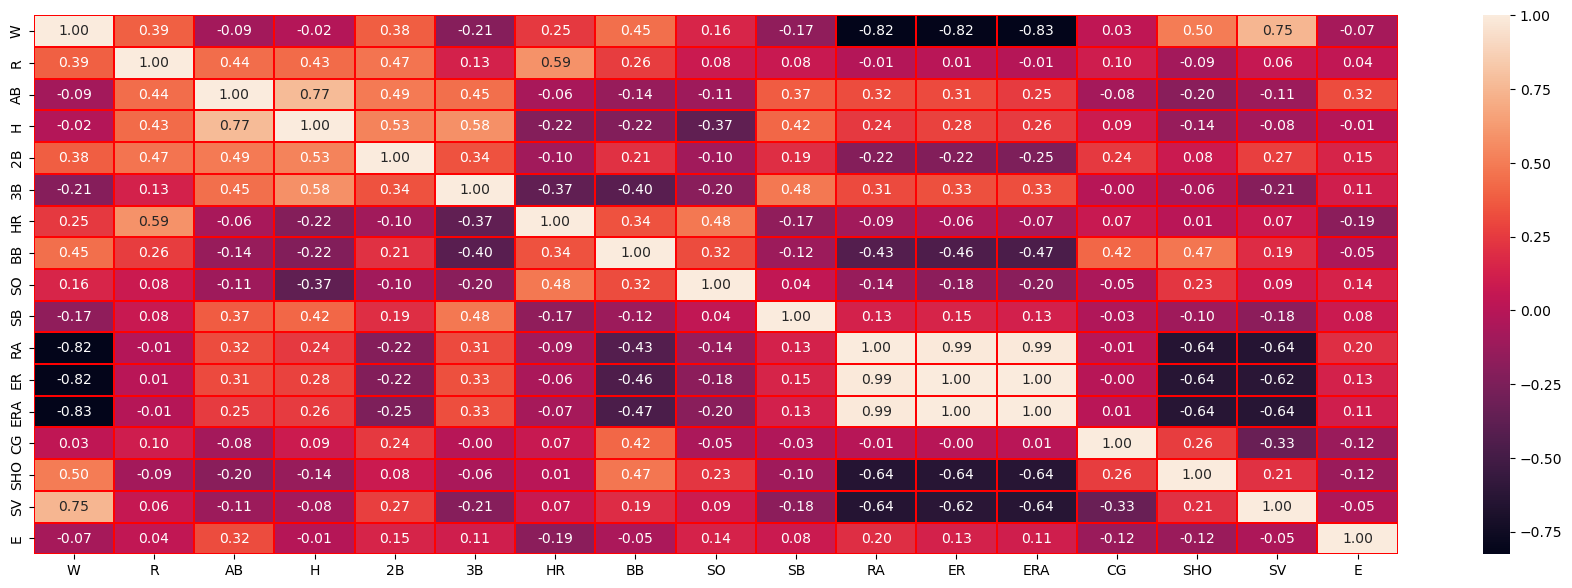

In [97]:
plt.figure(figsize=(22,7))
sns.heatmap(df1.corr(),annot=True,linewidths=0.1,linecolor="red",fmt="0.2f")

In [98]:
corr=df.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [101]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [102]:
corr_features = correlation(df1, 0.5)
len(set(corr_features))

9

In [103]:
corr_features #highly correlated features name

{'2B', '3B', 'ER', 'ERA', 'H', 'HR', 'RA', 'SHO', 'SV'}

In [104]:
df1.corr()['W'].sort_values() # f.corrwith(l)

ERA   -0.826952
RA    -0.823176
ER    -0.815308
3B    -0.206737
SB    -0.169503
AB    -0.085780
E     -0.072858
H     -0.018360
CG     0.029594
SO     0.156469
HR     0.245697
2B     0.384886
R      0.390451
BB     0.447513
SHO    0.497526
SV     0.749290
W      1.000000
Name: W, dtype: float64

<Axes: title={'center': 'Correlation with target'}>

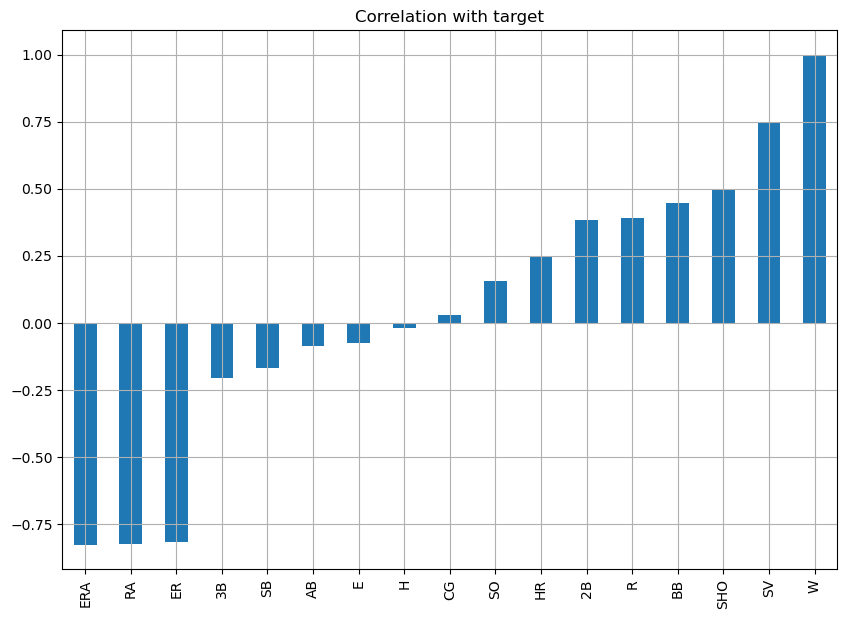

In [105]:
#graphical representation of correlation

df1.corr()['W'].sort_values().plot(kind='bar',grid=True,figsize=(10,7),title='Correlation with target')

In [106]:
#removing multicorrelated features 

f = df1.drop(columns=['W',  'AB', 'H',  '3B',   'SO', 'SB', 'RA', 'ER',
        'CG',  'E'], axis=1) #f for important only or best features
l = df1.W #l for label

In [107]:
#scaling to final feature


scalar = StandardScaler()
scaled_feature = scalar.fit_transform (f)

In [108]:
# after droping correlated features check VIF again
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (scaled_feature, i) for i in range (scaled_feature.shape[1])]
vif["Features"] = f.columns
#vif must be done after scaling the data 
#Let's check the values
vif

,vif,Features
0,2.925754,R
1,2.155338,2B
2,2.475624,HR
3,1.684869,BB
4,3.257540,ERA
5,2.052548,SHO
6,1.954878,SV


***split data into train and test***


In [111]:
maxAccu=0
lrm=LinearRegression()
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(scaled_feature,l,test_size=0.3,random_state=i)
    lrm = LinearRegression()
    lrm.fit(x_train, y_train)
    pred=lrm.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('the best accuracy is ',maxAccu,'on random state',maxRS)

the best accuracy is  0.9648474191608399 on random state 30


In [112]:
x_train,x_test,y_train,y_test=train_test_split(scaled_feature,l,test_size=0.3,random_state=30)

In [113]:
lrm = LinearRegression()
lrm.fit(x_train, y_train)

LinearRegression()

In [114]:
# Adjusted R2 score # .score is nothing but Adjusted R2 score
# when we have multiple feature that time we check Adjusted R2 score
print('Model accuracy score on training data------>',  lrm.score (x_train,y_train))
print('Model accuracy score on testing data------>',lrm.score(x_test,y_test))

Model accuracy score on training data------> 0.8820353239373457
Model accuracy score on testing data------> 0.9648474191608399


***Now our model performance is 94 % for training data set and 91 % for the test data set***

In [115]:
y_pred = lrm.predict(x_test)
y_pred

array([96.31928334, 73.44857898, 86.32076715, 85.44611395, 61.15502141,
       92.04634087, 80.91297443, 81.6268045 , 89.9487725 ])

In [117]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = lrm.predict(x_test)


In [118]:
print ('mean_absolute_error is --->',mean_absolute_error(y_test,y_pred))
print ('mean_squared_error is --->',mean_squared_error(y_test,y_pred))
print ('mean_squared_error is --->',np.sqrt(mean_squared_error(y_test,y_pred)))

mean_absolute_error is ---> 1.7218261132018544
mean_squared_error is ---> 3.7817233263264267
mean_squared_error is ---> 1.944665350729124


***lets see if our model is overfitting our training data***

In [126]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [128]:
lasscv = LassoCV (alphas = None, max_iter = 100) # normalize is similer to standerized the data
lasscv.fit(x_train, y_train)

LassoCV(max_iter=100)

In [129]:
alpha= lasscv.alpha_
alpha

0.3838807812643006

In [130]:
lasso_reg = Lasso (alpha)
lasso_reg. fit (x_train, y_train)

Lasso(alpha=0.3838807812643006)

In [131]:
lasso_reg.score(x_test,y_test)

0.9547483788904787

***Using Ridge regression model***

In [133]:
ridgecv=RidgeCV (alphas = np.arange (0.001,0.1,0.01))
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]))

In [134]:
ridgecv.alpha_

0.09099999999999998

In [135]:
ridge_model= Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.09099999999999998)

In [136]:
ridge_model.score(x_test, y_test)

0.9643886098900362

We got around same r2 square using Ridge regression as well. So, it's safe to say there is no overfitting.